In [1]:
%load_ext rpy2.ipython
%matplotlib inline
from fbprophet import Prophet
import pandas as pd

In [2]:
%%R
library(prophet)

/usr/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: Rcpp

  warnings.warn(x, RRuntimeWarning)


By default, Prophet uses a linear model for its forecast. When forecasting growth, there is usually some maximum achievable point: total market size, total population size, etc. This is called the carrying capacity, and the forecast should saturate at this point.

Prophet allows you to make forecasts using a [logistic growth](https://en.wikipedia.org/wiki/Logistic_function) trend model, with a specified carrying capacity. We illustrate this with the log number of page visits to the [R (programming language)](https://en.wikipedia.org/wiki/R_%28programming_language%29) page on Wikipedia:

In [3]:
df = pd.read_csv('../examples/example_wp_R.csv')
import numpy as np
df['y'] = np.log(df['y'])

In [4]:
%%R
df <- read.csv('../examples/example_wp_R.csv')
df$y <- log(df$y)

We must specify the carrying capacity in a column `cap`. Here we will assume a particular value, but this would usually be set using data or expertise about the market size.

In [5]:
df['cap'] = 8.5

In [6]:
%%R
df$cap <- 8.5

The important things to note are that `cap` must be specified for every row in the dataframe, and that it does not have to be constant. If the market size is growing, then `cap` can be an increasing sequence.

We then fit the model as before, except pass in an additional argument to specify logistic growth:

In [7]:
m = Prophet(growth='logistic')
m.fit(df)

In [8]:
%%R
m <- prophet(df, growth = 'logistic')

STAN OPTIMIZATION COMMAND (LBFGS)
init = user
save_iterations = 1
init_alpha = 0.001
tol_obj = 1e-12
tol_grad = 1e-08
tol_param = 1e-08
tol_rel_obj = 10000
tol_rel_grad = 1e+07
history_size = 5
seed = 625631580
initial log joint probability = -67.9808
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


We make a dataframe for future predictions as before, except we must also specify the capacity in the future. Here we keep capacity constant at the same value as in the history, and forecast 3 years into the future:

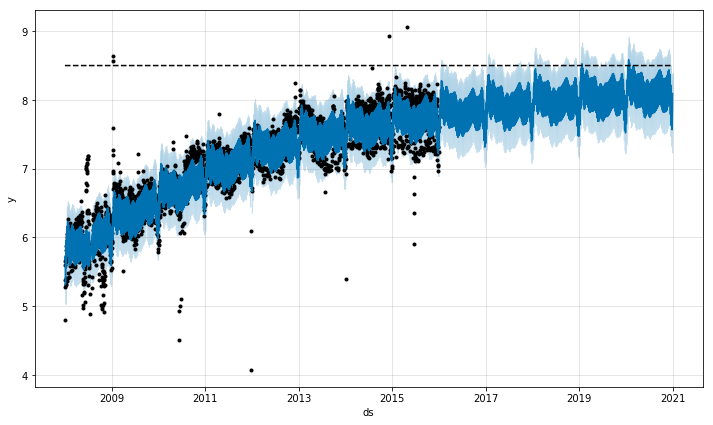

In [9]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

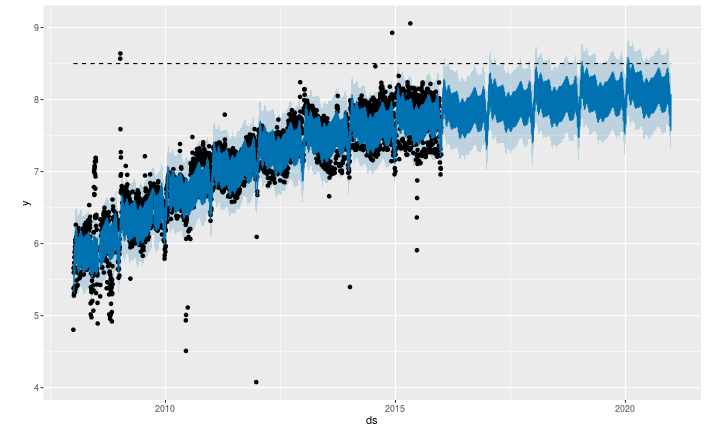

In [10]:
%%R -w 10 -h 6 -u in
future <- make_future_dataframe(m, periods = 1826)
future$cap <- 8.5
fcst <- predict(m, future)
plot(m, fcst);